In [17]:
import time
import numpy as np
from string import punctuation
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sqlite3
from math import ceil
from collections import Counter
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow as tf
from tensorflow import keras

data_directory = "./data"

# Overarching Objectives
* What loan product offers the most favorable terms?
* Which characteristics are associated with low interest rates?
* fico_range,amount_requested,amount_funded_by_investors,loan_length
* The interest rate effects the the total operating costs for a buisness. The lower the interest rate, the more fiscal wiggle room the buisness has.

In [18]:
investment_df_base = pd.read_csv('./linear_reg.csv')
investment_df_base.info()
investment_df_base.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [19]:
def split_fico(fico_range: str):
    fico_high , fico_low = fico_range.split("-")
    fico_mean = (int(fico_low) + int(fico_high))/2
    return fico_mean

<Axes: xlabel='amount_requested', ylabel='amount_funded_by_investors'>

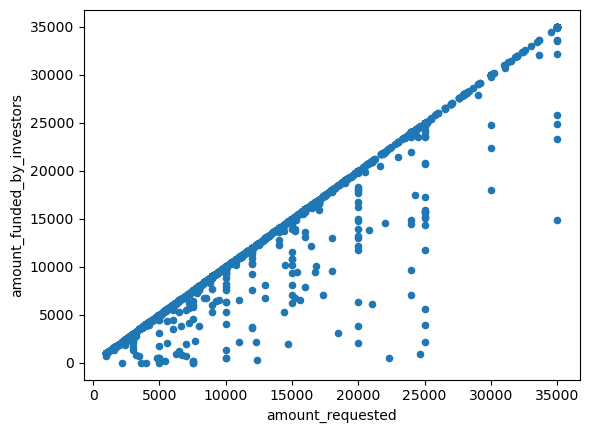

In [20]:
investment_df_base.plot.scatter(x='amount_requested', y='amount_funded_by_investors')
# investment_df_base['funded_difference'] = investment_df_base['amount_requested'] - investment_df_base['amount_funded_by_investors']
# investment_df_base.sort_values(by='amount_funded_by_investors', ascending=True)
# investment_df_base['fico_mean'] = investment_df_base['fico_range'].apply(split_fico)

In [21]:
investment_df_base

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.00,36.0
1,12.12,715-719,19200.0,19200.00,36.0
2,21.98,690-694,35000.0,35000.00,60.0
3,9.99,695-699,10000.0,9975.00,36.0
4,11.71,695-699,12000.0,12000.00,36.0
...,...,...,...,...,...
2493,16.77,705-709,30000.0,29950.00,60.0
2494,14.09,740-744,16000.0,16000.00,60.0
2495,13.99,680-684,10000.0,10000.00,36.0
2496,12.42,675-679,6000.0,6000.00,36.0
